In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/foodpanda-review-dataset/Foodpanda Analysis Dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/foodpanda-review-dataset/Foodpanda Analysis Dataset.csv')
df.head()

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
0,C5663,Male,Adult,Peshawar,1/14/2024,O9663,8/23/2023,McDonald's,Burger,Italian,5,1478.27,Cash,38,7/19/2025,238,Active,3,10/14/2024,Cancelled
1,C2831,Male,Adult,Multan,7/7/2024,O6831,8/23/2023,KFC,Burger,Italian,3,956.04,Wallet,24,11/25/2024,81,Active,2,8/21/2025,Delayed
2,C2851,Other,Senior,Multan,6/20/2025,O6851,8/23/2023,Pizza Hut,Fries,Italian,2,882.51,Cash,42,5/10/2025,82,Inactive,3,9/19/2024,Delayed
3,C1694,Female,Senior,Peshawar,9/5/2023,O5694,8/23/2023,Subway,Pizza,Dessert,4,231.30,Card,27,7/24/2025,45,Inactive,2,6/29/2025,Delayed
4,C4339,Other,Senior,Lahore,12/29/2023,O8339,8/24/2023,KFC,Sandwich,Dessert,1,1156.69,Cash,35,12/21/2024,418,Inactive,3,3/6/2025,Cancelled


In [3]:
# Importing necessary libraries:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
import seaborn as sns
from IPython.display import Markdown, display



In [4]:
# Exploring the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      6000 non-null   object 
 1   gender           6000 non-null   object 
 2   age              6000 non-null   object 
 3   city             6000 non-null   object 
 4   signup_date      6000 non-null   object 
 5   order_id         6000 non-null   object 
 6   order_date       6000 non-null   object 
 7   restaurant_name  6000 non-null   object 
 8   dish_name        6000 non-null   object 
 9   category         6000 non-null   object 
 10  quantity         6000 non-null   int64  
 11  price            6000 non-null   float64
 12  payment_method   6000 non-null   object 
 13  order_frequency  6000 non-null   int64  
 14  last_order_date  6000 non-null   object 
 15  loyalty_points   6000 non-null   int64  
 16  churned          6000 non-null   object 
 17  rating        

In [5]:
# Getting basic statistics:
df.describe()

,quantity,price,order_frequency,loyalty_points,rating
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2.991667,800.524880,25.304667,250.173667,2.996833
std,1.414778,404.855029,14.358930,144.608478,1.406113
min,1.000000,100.300000,1.000000,0.000000,1.000000
25%,2.000000,441.997500,13.000000,125.000000,2.000000
50%,3.000000,806.460000,25.000000,249.500000,3.000000
75%,4.000000,1149.737500,37.000000,378.000000,4.000000
max,5.000000,1499.950000,50.000000,500.000000,5.000000


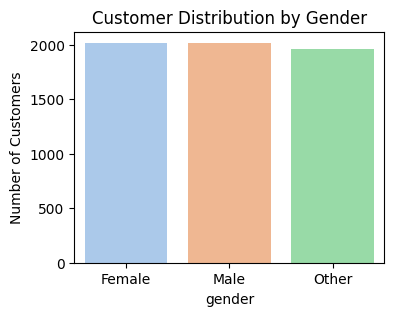

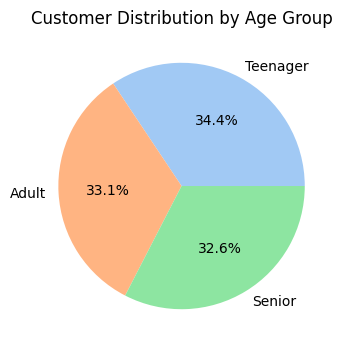

In [6]:
# 1. Gender distribution
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(4,3))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel")
plt.title("Customer Distribution by Gender")
plt.ylabel("Number of Customers")
plt.show()

# Age group distribution as Pie Chart
age_counts = df['age'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(age_counts.values, labels=age_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Customer Distribution by Age Group")
plt.show()

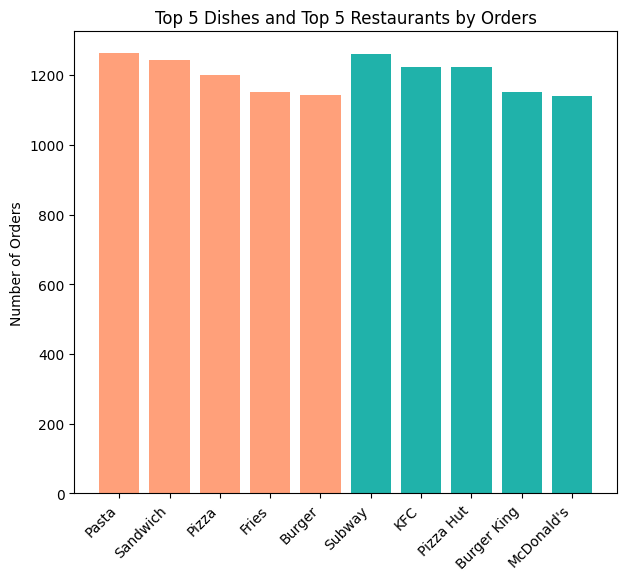

In [7]:
# Top 5 Dishes and Restaurants with counts
top_dishes = df['dish_name'].value_counts().head(5)
top_restaurants = df['restaurant_name'].value_counts().head(5)

# Combine names and orders
names = list(top_dishes.index) + list(top_restaurants.index)
orders = list(top_dishes.values) + list(top_restaurants.values)
colors = ['#FFA07A']*5 + ['#20B2AA']*5  # Different color for dishes and restaurants

plt.figure(figsize=(7,6))
plt.bar(names, orders, color=colors)
plt.ylabel("Number of Orders")
plt.title("Top 5 Dishes and Top 5 Restaurants by Orders")
plt.xticks(rotation=45, ha='right')
plt.show()

Total Orders by Age Group:
age
Teenager    6192
Adult       5943
Senior      5815
Name: quantity, dtype: int64


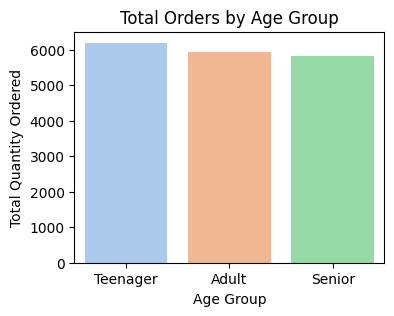

**Teenagers place the most orders; targeting them could boost sales.**

In [8]:
# Total Orders by Age group
orders_by_age = df.groupby('age')['quantity'].sum().sort_values(ascending=False)
print("Total Orders by Age Group:")
print(orders_by_age)

# Visualization
plt.figure(figsize=(4,3))
sns.barplot(x=orders_by_age.index, y=orders_by_age.values, palette="pastel")
plt.title("Total Orders by Age Group")
plt.ylabel("Total Quantity Ordered")
plt.xlabel("Age Group")
plt.show()

insight = "**Teenagers place the most orders; targeting them could boost sales.**"
display(Markdown(insight))

Average Order Frequency per Age Group:
age
Adult       25.29
Senior      25.52
Teenager    25.11
Name: order_frequency, dtype: float64


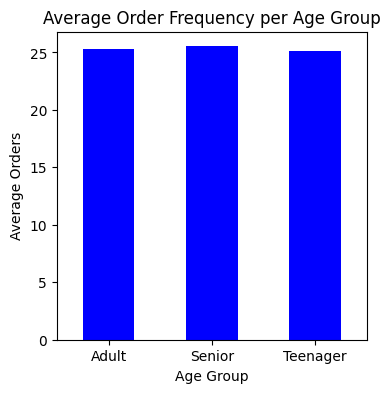

In [9]:
# Average orders per customer per age group
avg_orders = df.groupby('age')['order_frequency'].mean()

# Print results
print("Average Order Frequency per Age Group:")
print(avg_orders.round(2))

# Bar chart
plt.figure(figsize=(4,4))
avg_orders.plot(kind='bar', color='blue')
plt.title('Average Order Frequency per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Orders')
plt.xticks(rotation=0)
plt.show()

Customer Churn Status:
churned
Active      3016
Inactive    2984
Name: count, dtype: int64


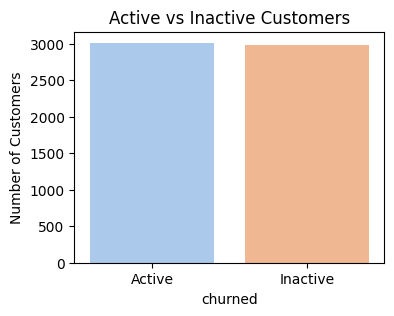

**Nearly half of the customers are inactive, targeting them with loyalty programs could improve retention.**

In [10]:
# Churn counts
churn_counts = df['churned'].value_counts()
print("Customer Churn Status:")
print(churn_counts)

# Visualization
plt.figure(figsize=(4,3))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="pastel")
plt.title("Active vs Inactive Customers")
plt.ylabel("Number of Customers")
plt.show()
insight = "**Nearly half of the customers are inactive, targeting them with loyalty programs could improve retention.**"
display(Markdown(insight))

          Total Customers  Inactive  Churn Rate (%)
age                                                
Adult                1984       963           48.54
Senior               1954      1005           51.43
Teenager             2062      1016           49.27


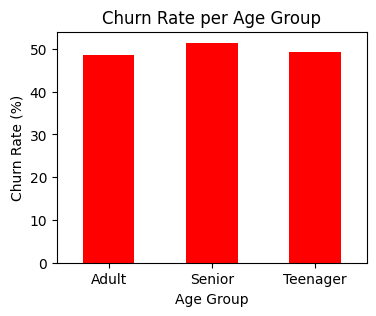

**seniors have the highest churn rate at 51.4%,targeted retenion strategies could reduce churn across all age groups.**

In [11]:
# Total customers per age group
total_count = df['age'].value_counts().sort_index()

# Inactive customers per age group
inactive_count = df[df['churned'] == 'Inactive'].groupby('age').size().reindex(total_count.index, fill_value=0)

# Churn rate %
churn_rate = (inactive_count / total_count) * 100

# Create a summary table
summary_table = pd.DataFrame({
    'Total Customers': total_count,
    'Inactive': inactive_count,
    'Churn Rate (%)': churn_rate.round(2)
})

# Print the table
print(summary_table)

# Bar chart
plt.figure(figsize=(4,3))
churn_rate.plot(kind='bar', color='red')
plt.title('Churn Rate per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=0)
plt.show()
insight = "**seniors have the highest churn rate at 51.4%,targeted retenion strategies could reduce churn across all age groups.**"
display(Markdown(insight))

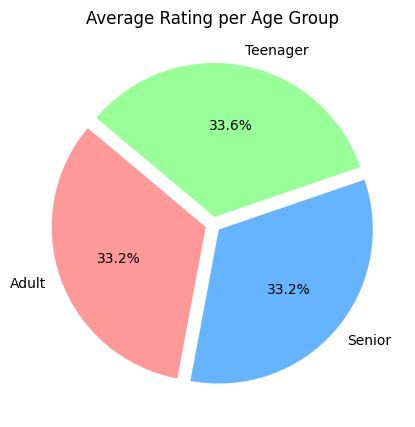

In [12]:
# Average rating per age group
avg_rating = df.groupby('age')['rating'].mean()

# Pie chart
plt.figure(figsize=(5,5))
colors = ['#ff9999','#66b3ff','#99ff99']
plt.pie(avg_rating, labels=avg_rating.index, autopct='%1.1f%%', colors=colors, startangle=140, explode=(0.05,0.05,0.05))
plt.title('Average Rating per Age Group')
plt.show()

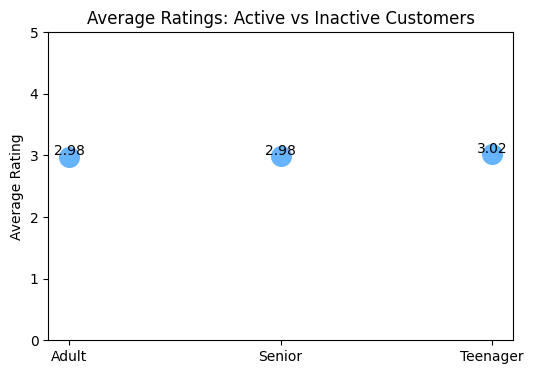

**Inactive customers give slightly higher ratings than active ones, showing that satisfaction alone does not ensure retention.**

In [13]:
# Import libraries (agar pehle se import nahi ki hui)
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import numpy as np
import pandas as pd

# Example avg_rating (replace this with your actual variable)
# Ye line sirf demo ke liye hai, aap apna avg_rating use karein
# avg_rating = pd.Series({'Active': 3.8, 'Inactive': 4.1})

# Handle dictionary or pandas Series
if isinstance(avg_rating, dict):
    x = list(avg_rating.keys())
    y = list(avg_rating.values())
elif isinstance(avg_rating, pd.Series):
    x = avg_rating.index.tolist()
    y = avg_rating.values
else:
    raise TypeError("avg_rating should be a dict or pandas Series")

# Scatter plot
plt.figure(figsize=(6,4))
plt.scatter(x, y, s=200, color='#66b3ff')  # single color to avoid mismatch
plt.ylim(0,5)
plt.title("Average Ratings: Active vs Inactive Customers")
plt.ylabel("Average Rating")

# Add value labels above points
for i, v in enumerate(y):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.show()

# Display insight using Markdown
insight = "**Inactive customers give slightly higher ratings than active ones, showing that satisfaction alone does not ensure retention.**"
display(Markdown(insight))


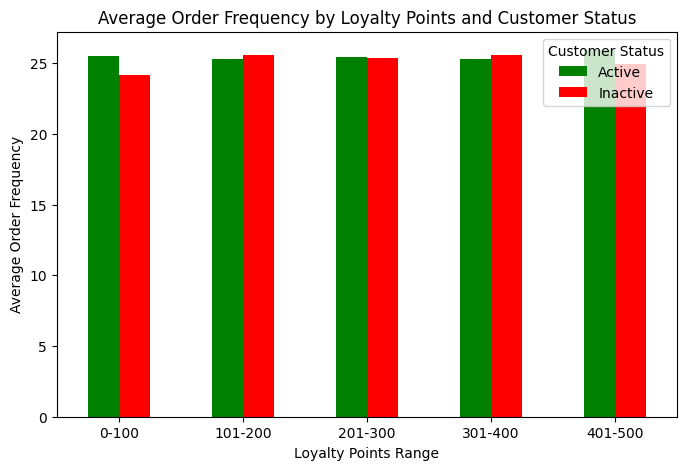

**oder frequency and loyalty points are similar for both active and inactive customers, indicating that points alone do not ensure retention.**

In [14]:
# Define loyalty bins
bins = [0, 100, 200, 300, 400, 500]
labels = ['0-100','101-200','201-300','301-400','401-500']
df['loyalty_bin'] = pd.cut(df['loyalty_points'], bins=bins, labels=labels, include_lowest=True)

# Calculate average order frequency per bin by churn status
avg_order = df.groupby(['loyalty_bin','churned'])['order_frequency'].mean().reset_index()

# Pivot for plotting
avg_order_pivot = avg_order.pivot(index='loyalty_bin', columns='churned', values='order_frequency')

# Plot
avg_order_pivot.plot(kind='bar', figsize=(8,5), color=['green','red'])
plt.title("Average Order Frequency by Loyalty Points and Customer Status")
plt.xlabel("Loyalty Points Range")
plt.ylabel("Average Order Frequency")
plt.xticks(rotation=0)
plt.legend(title='Customer Status')
plt.show()
insight = "**oder frequency and loyalty points are similar for both active and inactive customers, indicating that points alone do not ensure retention.**"
display(Markdown(insight))

In [15]:
# Delivery status counts
delivery_counts = df['delivery_status'].value_counts()
print("Delivery Status Counts:")
print(delivery_counts)

Delivery Status Counts:
delivery_status
Delivered    2060
Delayed      1972
Cancelled    1968
Name: count, dtype: int64


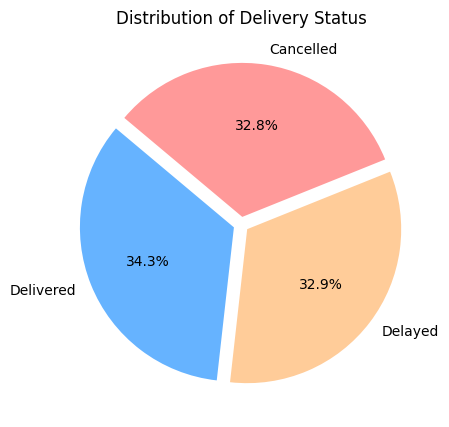

**Almost half of the orders are either delayed or cancelled, indicating potential risks for customer retention and satisfaction.**

In [16]:
import matplotlib.pyplot as plt

# Delivery status counts
delivery_counts = df['delivery_status'].value_counts()

# Pie chart
plt.figure(figsize=(5,5))
colors = ['#66b3ff','#ffcc99','#ff9999']
plt.pie(delivery_counts, labels=delivery_counts.index, autopct='%1.1f%%', startangle=140, explode=(0.05,0.05,0.05), colors=colors)
plt.title("Distribution of Delivery Status")
plt.show()
insight = "**Almost half of the orders are either delayed or cancelled, indicating potential risks for customer retention and satisfaction.**"
display(Markdown(insight))


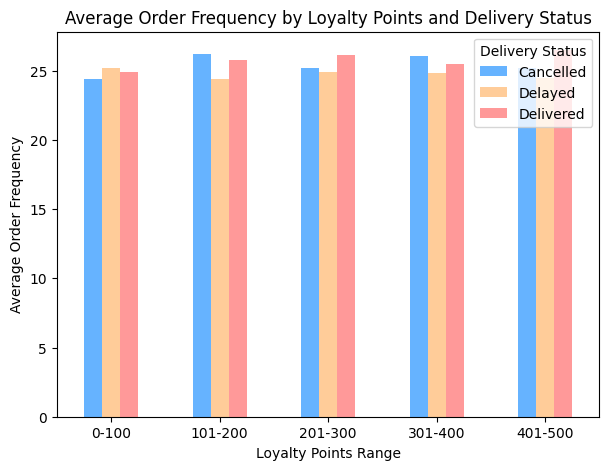

In [17]:
avg_order = df.groupby(['loyalty_bin','delivery_status'])['order_frequency'].mean().reset_index()

# Pivot for plotting
avg_order_pivot = avg_order.pivot(index='loyalty_bin', columns='delivery_status', values='order_frequency')

# Plot
avg_order_pivot.plot(kind='bar', figsize=(7,5), color=['#66b3ff','#ffcc99','#ff9999'])
plt.title("Average Order Frequency by Loyalty Points and Delivery Status")
plt.xlabel("Loyalty Points Range")
plt.ylabel("Average Order Frequency")
plt.xticks(rotation=0)
plt.legend(title='Delivery Status')
plt.show()


In [18]:
# Payment method counts
payment_counts = df['payment_method'].value_counts()
print("Payment Method Counts:")
print(payment_counts)

Payment Method Counts:
payment_method
Cash      2039
Card      2002
Wallet    1959
Name: count, dtype: int64


In [19]:
area_orders = df['city'].value_counts().head(10)  # ٹاپ 10 ایریاز
print(area_orders)

city
Multan       1256
Lahore       1217
Peshawar     1195
Islamabad    1187
Karachi      1145
Name: count, dtype: int64


In [20]:
df['order_day'] = pd.to_datetime(df['order_date']).dt.day_name()
orders_by_day = df['order_day'].value_counts()
print(orders_by_day)

order_day
Monday       892
Friday       878
Sunday       877
Thursday     864
Saturday     864
Tuesday      813
Wednesday    812
Name: count, dtype: int64


In [21]:
from IPython.display import display, Markdown

summary_md = """
# **Executive Summary**
This project analyzed 6,000 Foodpanda orders to understand customer behavior, order trends, and retention across demographics, cities, and days of the week.

# **Key Insights**
- **Customer distribution** is almost equal by gender and age group.
- **Teenagers** placed slightly more orders than adults and seniors.
- Top dishes: **Pasta, Sandwich, Pizza**; Top restaurants: **Subway, KFC, Pizza Hut**.
- **Churn rate** is ~49%; delivery issues (Delayed/Cancelled) are nearly half of all orders.
- Delivery status distribution is similar for **Active and Inactive customers**.
- Most orders come from **Multan, Lahore, Peshawar**; peak days: Monday, Friday, Sunday.
- **Inactive customers** are evenly distributed across Delivered, Delayed, and Cancelled orders.

# **Recommendations**
- Focus advertising campaigns on **peak days**.
- Prioritize top-order cities for **marketing and delivery optimization**.
- Investigate low-order cities like **Karachi** to improve engagement.
- Monitor **delivery performance** to reduce cancellations and delays.

# **Closing Statement**
Overall, the analysis highlights **key customer behavior patterns, order trends, and actionable areas** to improve retention and engagement.
"""

display(Markdown(summary_md))


# **Executive Summary**
This project analyzed 6,000 Foodpanda orders to understand customer behavior, order trends, and retention across demographics, cities, and days of the week.

# **Key Insights**
- **Customer distribution** is almost equal by gender and age group.
- **Teenagers** placed slightly more orders than adults and seniors.
- Top dishes: **Pasta, Sandwich, Pizza**; Top restaurants: **Subway, KFC, Pizza Hut**.
- **Churn rate** is ~49%; delivery issues (Delayed/Cancelled) are nearly half of all orders.
- Delivery status distribution is similar for **Active and Inactive customers**.
- Most orders come from **Multan, Lahore, Peshawar**; peak days: Monday, Friday, Sunday.
- **Inactive customers** are evenly distributed across Delivered, Delayed, and Cancelled orders.

# **Recommendations**
- Focus advertising campaigns on **peak days**.
- Prioritize top-order cities for **marketing and delivery optimization**.
- Investigate low-order cities like **Karachi** to improve engagement.
- Monitor **delivery performance** to reduce cancellations and delays.

# **Closing Statement**
Overall, the analysis highlights **key customer behavior patterns, order trends, and actionable areas** to improve retention and engagement.
